In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import process_utility as psu
import scipy.integrate as integ
from scipy.optimize import curve_fit
import time

In [2]:
data = psu.read_file('data/2020_11_09/SiPM1_27_5_LED2p75.dat')

data/2020_11_09/SiPM1_27_5_LED2p75.dat Number of events 303153.0


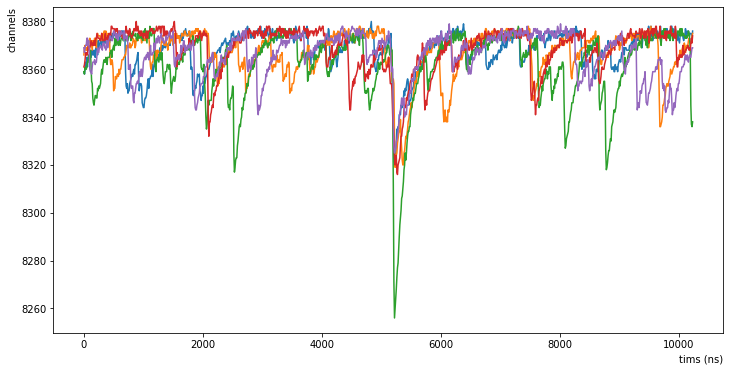

In [3]:
dts = np.arange(0,data.shape[1]*10,10)
psu.plot_waveforms(dts,data,5)

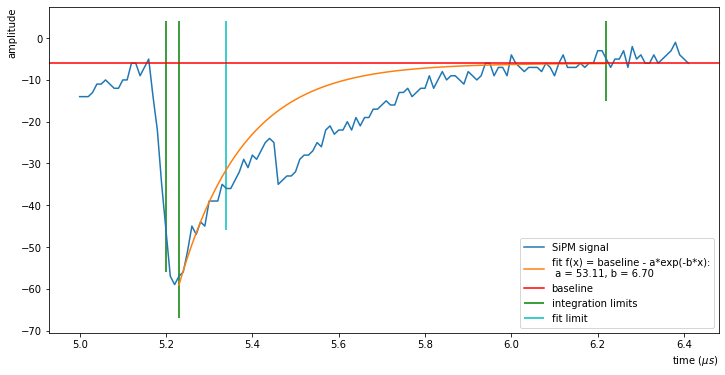

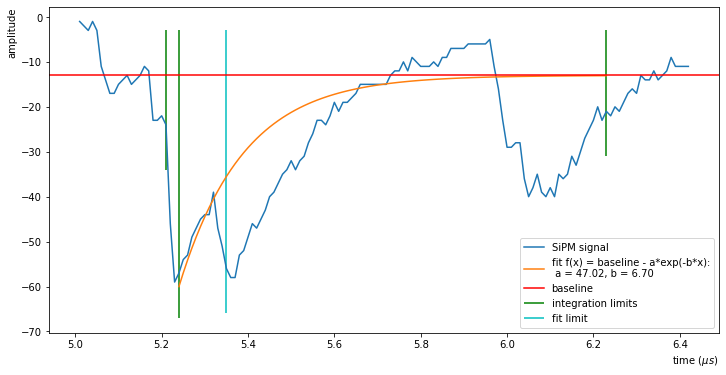

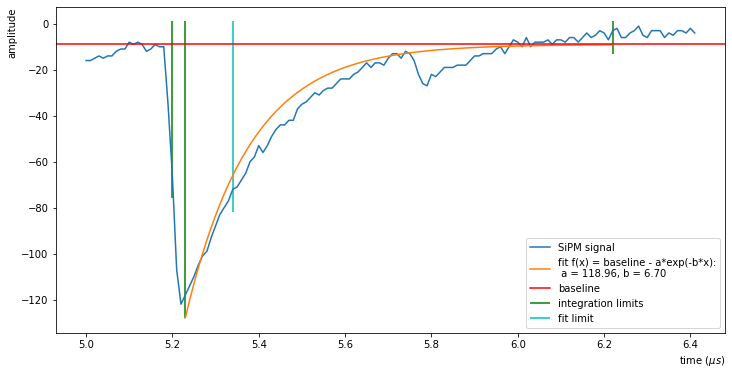

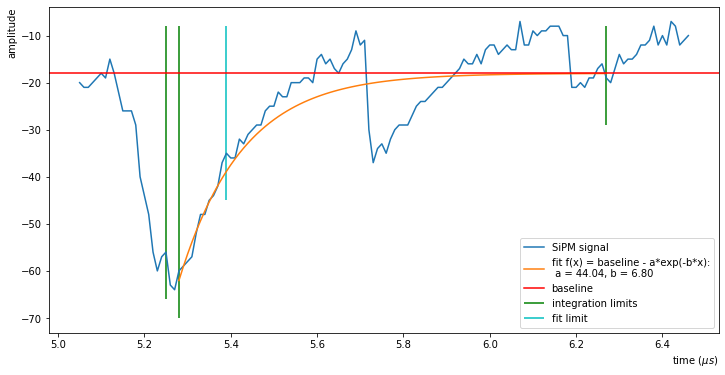

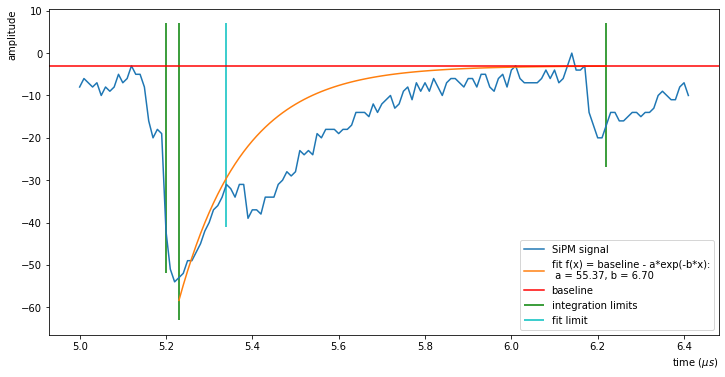

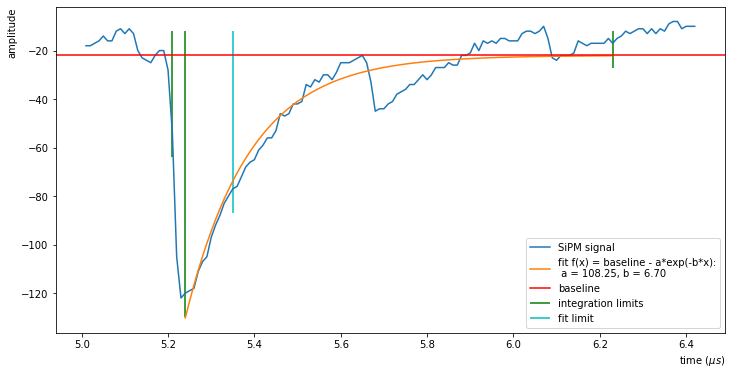

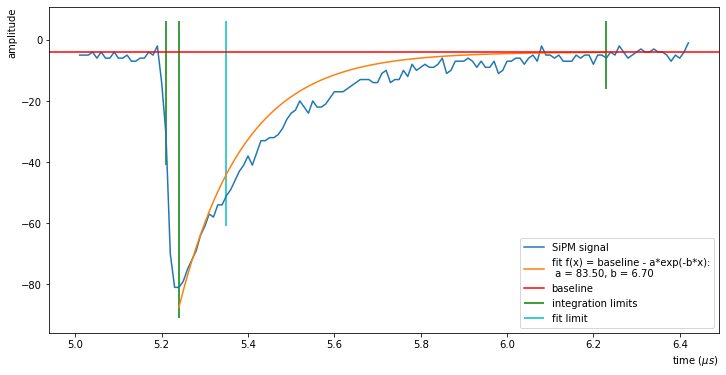

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

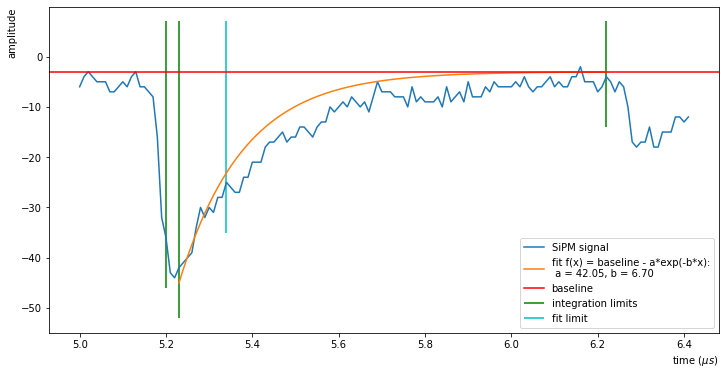

In [4]:
for i in range(10):
    plt.figure(figsize=(12,6))
    dts = np.arange(0,data.shape[1]*10,10)
    listpeaks = psu.search_peaks(dts, data[i], 4, 9, False)
    psu.integral_central_peak(data[i],listpeaks, dtl=-2, dtr=1, tfit=12,
                              tlim=100,tc=5,tll=2,tlr=10,plot=1)

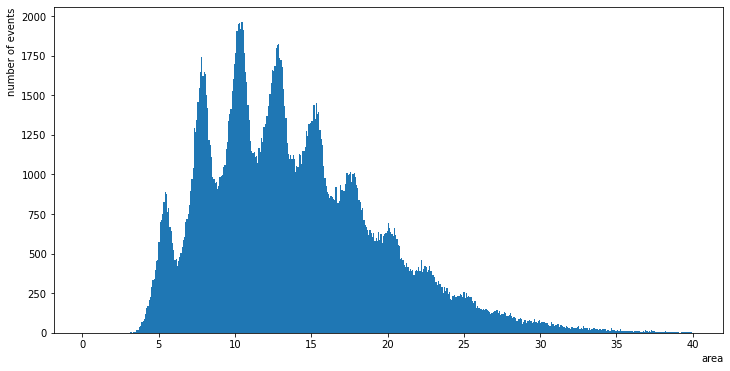

In [4]:
peakint1 = np.load('peakint_SiPM1_27_5_LED2p75_1.npy')
psu.histo_plot(peakint1,0.1,40,500)
# dtl = -2, dtr = 1, tfit = 20
#psu.integral_central_peak(data[i],listpeaks,-2,1,20,100,5,8,10)

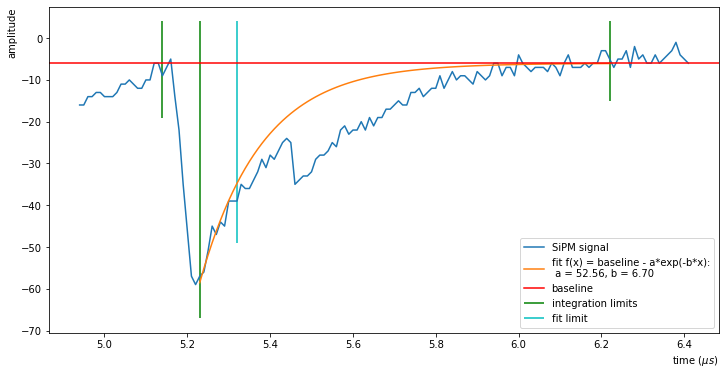

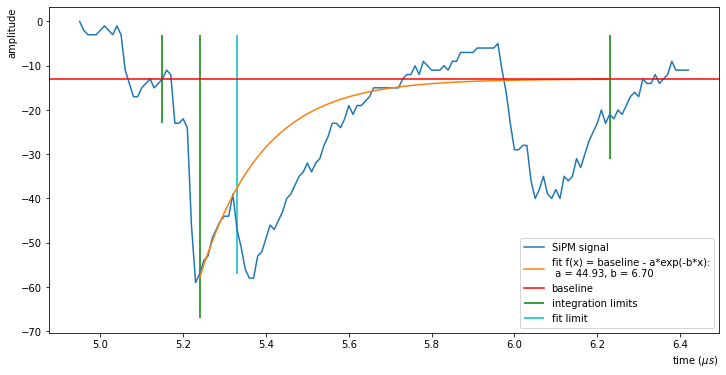

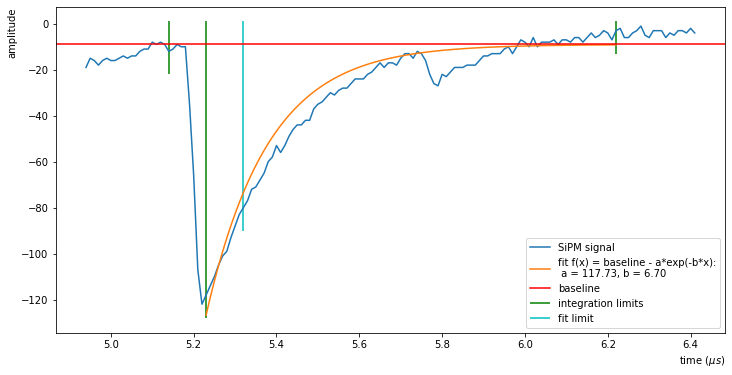

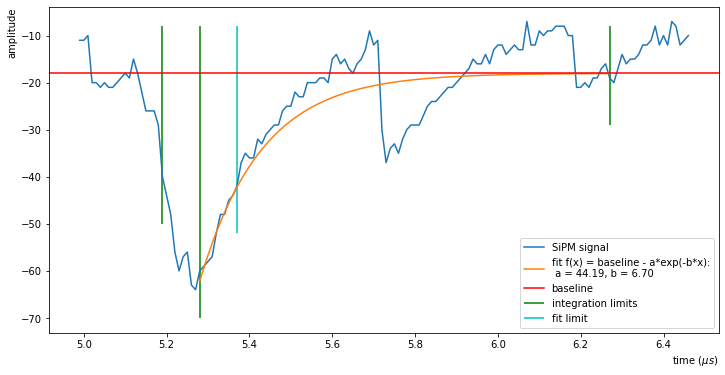

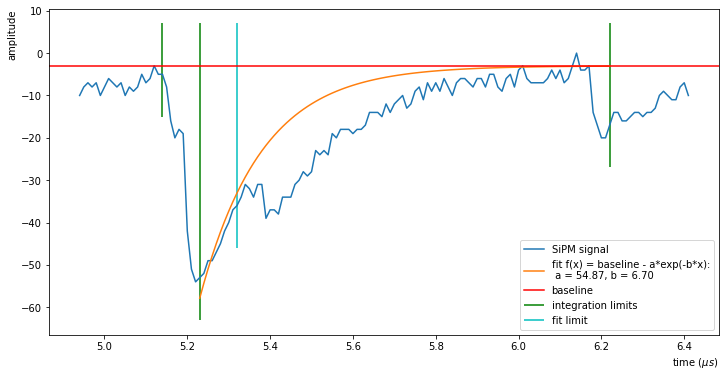

In [5]:
for i in range(5):
    plt.figure(figsize=(12,6))
    dts = np.arange(0,data.shape[1]*10,10)
    listpeaks = psu.search_peaks(dts, data[i], 4, 9, False)
    psu.integral_central_peak(data[i],listpeaks, dtl=-8, dtr=1, tfit=10,
                              tlim=100,tc=5,tll=2,tlr=10,plot=1)

In [ ]:
nn = len(data)
peakint = np.zeros(nn)
print('Total events:',nn)
t_start = time.time()
for i in range(nn):
    listpeaks = psu.search_peaks(dts, data[i], 4, 9, False)
    peakint[i] = psu.integral_central_peak(data[i],listpeaks,-8,1,10,100,5,8,10)
    diff = time.time() - t_start
    if (i % 1000) == 0:
        print(f'event n. {i} area: {peakint[i]:.2f}, time to process: {diff:.2f}')
psu.histo_plot(peakint,0.1,40,500)

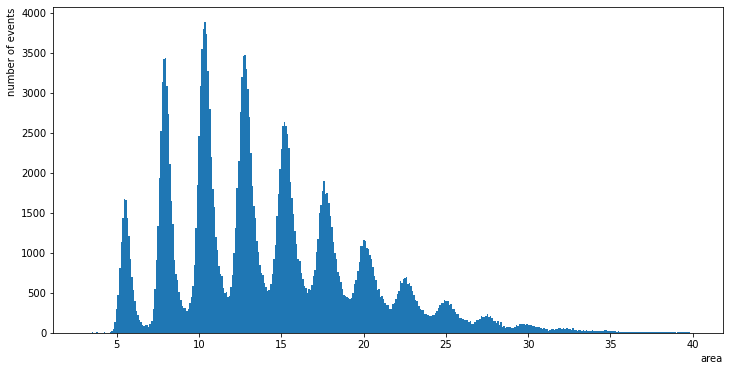

In [3]:
#np.save('peakint_SiPM1_27_5_LED2p75.npy', peakint)
peakint = np.load('peakint_SiPM1_27_5_LED2p75.npy')
psu.histo_plot(peakint,3,40,400)
# dtl = -8, dtr = 1, tfit = 10 

/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


PE 1 at 5.51 +/- 0.01 ADC x us
PE 2 at 7.93 +/- 0.01 ADC x us
PE 3 at 10.35 +/- 0.01 ADC x us
PE 4 at 12.78 +/- 0.01 ADC x us
PE 5 at 15.22 +/- 0.01 ADC x us
PE 6 at 17.65 +/- 0.02 ADC x us
PE 7 at 20.07 +/- 0.02 ADC x us
PE 8 at 22.50 +/- 0.06 ADC x us
PE 9 at 24.94 +/- 0.09 ADC x us
PE 10 at 27.41 +/- 0.27 ADC x us
PE 11 at 29.96 +/- 0.58 ADC x us
PE 12 at 31.92 +/- 0.24 ADC x us


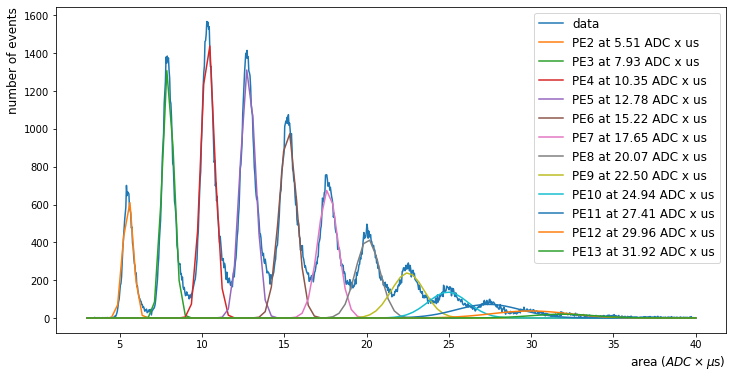

In [8]:
pe, pe_err = psu.spectrum_fit(peakint,3,40,1000,300,1)

(array([0.67765139, 2.423487  ]), array([0.07515286, 0.00910247]))

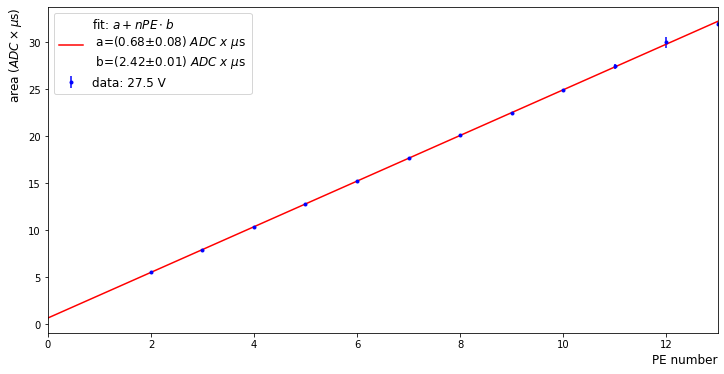

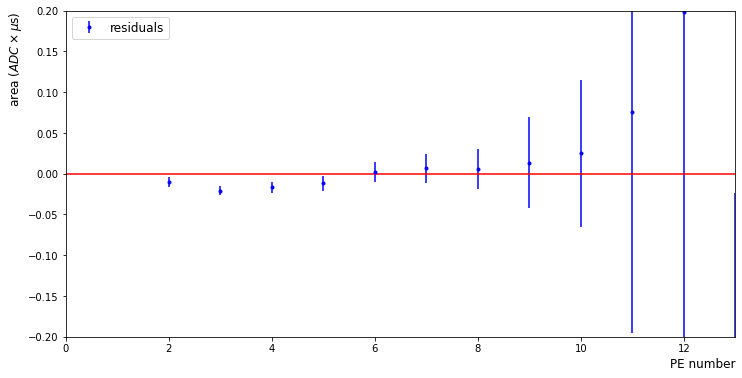

In [9]:
psu.fit_pe(pe,pe_err,2,13,0.2,1)